In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [42]:
def generate_data(x_mean, y_mean, x_std, y_std):
    data_1 = np.column_stack((np.random.normal(loc=x_mean, scale=x_std, size=1000)
                        ,np.random.normal(loc=y_mean, scale=y_std, size=1000)))
    data_2 = np.random.uniform(low=10.0, high=0, size=(500, 2))
    return np.concatenate([data_1, data_2])

In [43]:
def plotear_points_and_rectangle(data, a, b, coords):
    rango_x = (coords[0], a+coords[0])
    rango_y = (coords[1], b+coords[1])
    puntos_dentro = data[(rango_x[0] < data[:, 0]) & (data[:, 0] < rango_x[1]) & (rango_y[0] < data[:, 1]) & (data[:, 1] < rango_y[1])]
    f, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(data[:,0], data[:,1], s=.5)
    if len(puntos_dentro) > 0:
        ax.scatter(puntos_dentro[:, 0], puntos_dentro[:, 1], color='red', s=.5)

    rect = patches.Rectangle((rango_x[0], rango_y[0]), rango_x[1]-rango_x[0], rango_y[1]-rango_y[0], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.show(len(puntos_dentro))

def funcion_objetivo(data, a, b, coords):
    rango_x = (coords[0], a+coords[0])
    rango_y = (coords[1], b+coords[1])
    puntos_dentro = data[(rango_x[0] < data[:, 0]) & (data[:, 0] < rango_x[1]) & (rango_y[0] < data[:, 1]) & (data[:, 1] < rango_y[1])]

    return len(puntos_dentro)


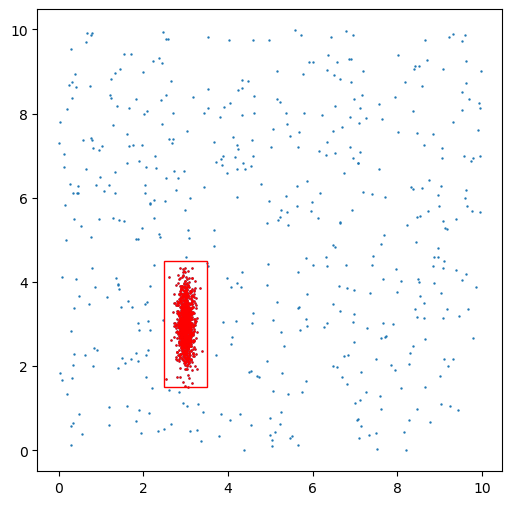

In [46]:
np.random.seed(0)
data = generate_data(3, 3, 0.1, 0.5)
plotear_points_and_rectangle(data, 1, 3, (2.5,1.5))

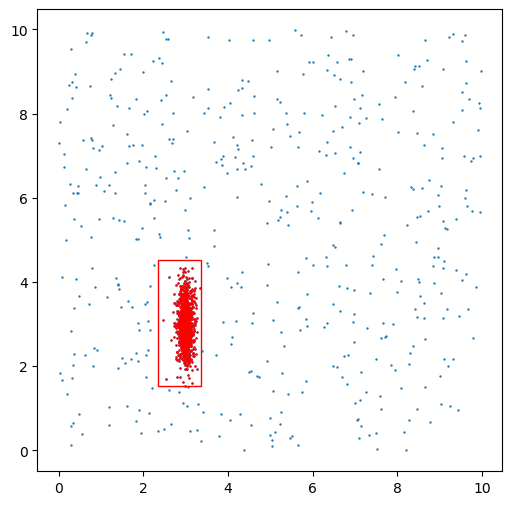

In [47]:
def optimizacion_busqueda_aleatoria(data, a, b, x_bounds, y_bounds, iteraciones=1000):
    mejor_puntuacion = 0
    mejor_coords = None

    for _ in range(iteraciones):
        coords = np.random.uniform(low=(x_bounds[0], y_bounds[0]), high=(x_bounds[1], y_bounds[1]))
        puntuacion = funcion_objetivo(data, a, b, coords)

        if puntuacion > mejor_puntuacion:
            mejor_puntuacion = puntuacion
            mejor_coords = coords

    return mejor_coords, mejor_puntuacion

a = 1
b = 3

mejor_coords, _ = optimizacion_busqueda_aleatoria(data, a, b, (0, 10), (0, 10), 1000)
plotear_points_and_rectangle(data, a, b, mejor_coords)

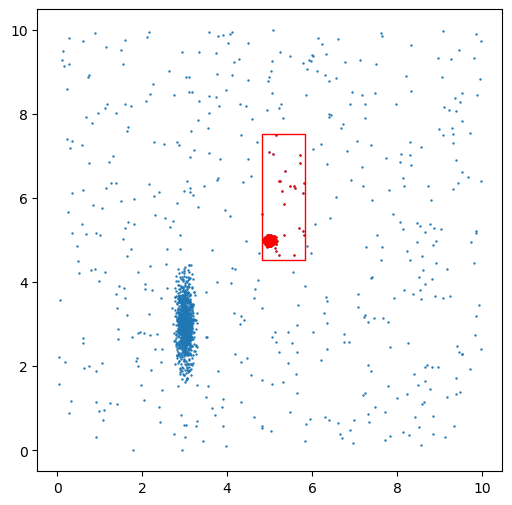

In [48]:
data_1 = generate_data(3, 3, 0.1, 0.5)
data_2 = np.column_stack((np.random.normal(loc=5, scale=.05, size=1000)
                    ,np.random.normal(loc=5, scale=.05, size=1000)))

data = np.concatenate([data_1, data_2])

a = 1
b = 3

mejor_coords, _ = optimizacion_busqueda_aleatoria(data, a, b, (0, 10), (0, 10), 1000)
plotear_points_and_rectangle(data, a, b, mejor_coords)

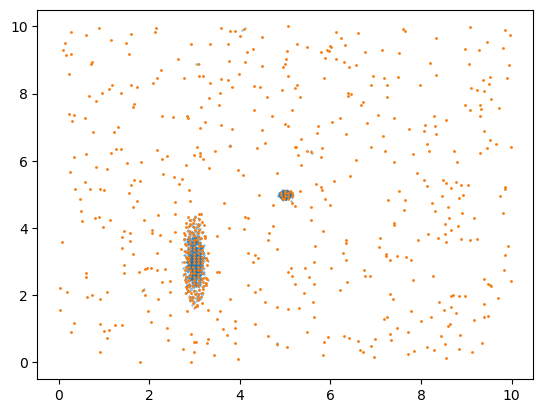

In [49]:
def discretizar(data, discr):
    x = np.arange(data[:,0].min(), data[:,0].max()+discr, discr)
    y = np.arange(data[:,1].min(), data[:,1].max()+discr, discr)
    xx, yy = np.meshgrid(x, y)

    medias = []
    for i in range(len(x)-1):
        for j in range(len(y)-1):
            points_in_cell = data[(data[:,0] >= xx[i,j]) & (data[:,0] < xx[i+1,j+1]) &
                                (data[:,1] >= yy[i,j]) & (data[:,1] < yy[i+1,j+1])]
            if len(points_in_cell) != 0:
                cell_mean = np.mean(points_in_cell, axis=0)
                medias.append(cell_mean)

    return np.array(medias)

coordenadas_disc = discretizar(data, 0.1)

plt.scatter(data[:, 0], data[:, 1], s = .1)
plt.scatter(coordenadas_disc[:, 0], coordenadas_disc[:, 1], s = 1)
plt.show()

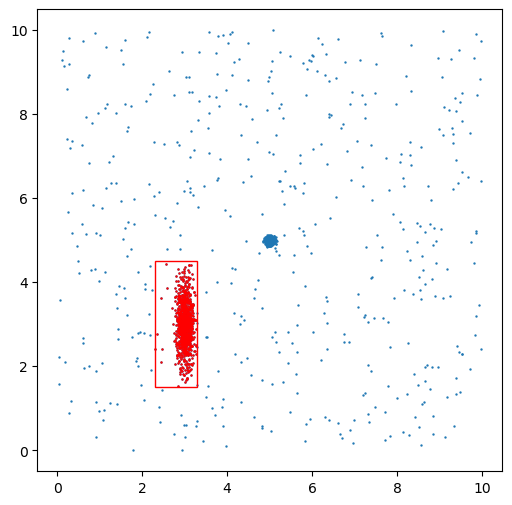

In [50]:
mejor_coords, _ = optimizacion_busqueda_aleatoria(coordenadas_disc, a, b, (0, 10), (0, 10), 1000)
plotear_points_and_rectangle(data, a, b, mejor_coords)

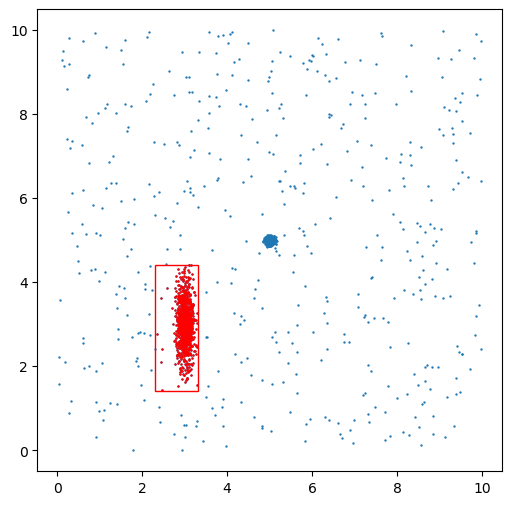

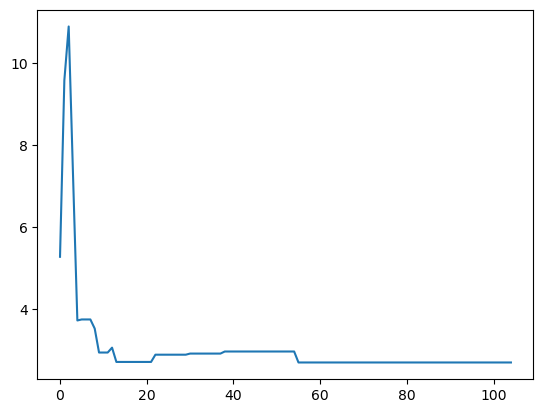

In [57]:
def funcion_objetivo(data, a, b, coords):
    rango_x = (coords[0], a+coords[0])
    rango_y = (coords[1], b+coords[1])
    puntos_dentro = data[(rango_x[0] < data[:, 0]) & (data[:, 0] < rango_x[1]) & (rango_y[0] < data[:, 1]) & (data[:, 1] < rango_y[1])]

    return len(puntos_dentro)

def generar_nuevos_puntos(puntos, sigma=1):
    if puntos is not None: 
        return puntos + np.random.normal(scale=sigma, size=puntos.shape)

def optimizacion_busqueda_aleatoria_adaptativa(data, a, b, x_bounds, y_bounds, num_iteraciones=100, num_puntos_iniciales=5):
    '''
    Descripcion de la funcion:
    Al inicio genera 5 puntos aleatoriamente a los que llama mejores_puntos y luego va añadiendo uno en cada iteracion. Creo que el plantemiento puede ser mejorable
    '''
    mejores_puntos = np.random.uniform(low=(x_bounds[0], y_bounds[0]), high=(x_bounds[1], y_bounds[1]), size=(5, 2))
    mejor_puntuacion = 0
    mejor_coords = None

    for _ in range(num_iteraciones):
        nuevos_puntos = generar_nuevos_puntos(mejores_puntos)
        for punto in nuevos_puntos:
            puntuacion = funcion_objetivo(data, a, b, punto)
            if puntuacion > mejor_puntuacion:
                mejor_puntuacion = puntuacion
                mejor_coords = punto
        mejores_puntos = np.concatenate((mejores_puntos, mejor_coords.reshape(-1, 2)), axis=0)
        
    return mejor_coords, mejor_puntuacion, mejores_puntos

a = 1
b = 3

mejor_coords, mejor_puntuacion, mejores_puntos = optimizacion_busqueda_aleatoria_adaptativa(coordenadas_disc, a, b, (0, 10), (0, 10), num_iteraciones=100)
plotear_points_and_rectangle(data, a, b, mejor_coords)

plt.plot(np.sqrt(mejores_puntos[:, 0]**2+mejores_puntos[:, 1]**2))
plt.show()

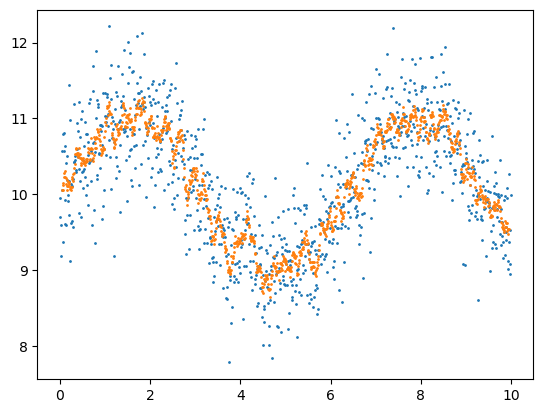

In [22]:
x = np.linspace(0 ,10,1000)
t = np.sin(x)+10+np.random.normal(0, 0.5, 1000)

def moving_average(arr, wdw):
    weights = np.ones(wdw) / wdw
    return np.convolve(arr, weights, mode='valid')


media_movil_x = moving_average(x, 10)
media_movil_y = moving_average(t, 10)

plt.scatter(x, t, s = 1)
plt.scatter(media_movil_x, media_movil_y, s = 1)
plt.show()


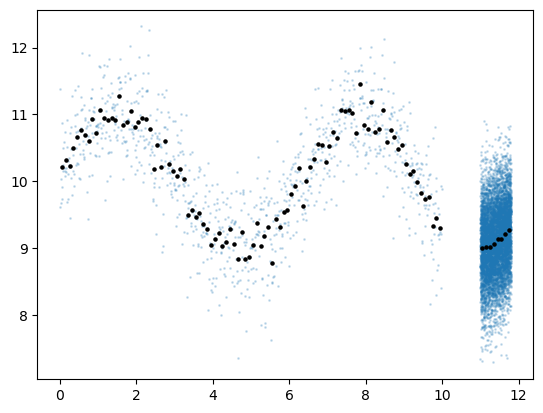

In [24]:
def media_por_intervalo(x, y, discr = 0.1):
    intervalos = np.arange(x.min(), x.max() + discr, discr)
    indices = np.digitize(x, intervalos)
    media_por_intervalo = [np.mean(y[indices == i]) for i in range(1, len(intervalos))]
    nuevo_x = intervalos[:-1] + discr/2
    return nuevo_x, media_por_intervalo

x = np.concatenate([np.arange(0,10, 0.01), np.arange(11,11.8, 0.0001)])
t = np.sin(x)+10+np.random.normal(0, 0.5, len(x))

nueva_x, nueva_y = media_por_intervalo(x, t, discr = 0.1)

plt.scatter(x, t, s = 1, alpha= 0.2)
plt.scatter(nueva_x, nueva_y, color='k', s = 5)
plt.show()